<a href="https://colab.research.google.com/github/jana-nf/Estagio_CBL_CienciaDeDados_HDL/blob/main/Estagio_CBL_CienciaDeDados_HDL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estagio_CBL_CiênciaDeDados_HDL

### Protótipo de pipeline de dados (ETL/ELT) desenvolvido com Python, Pandas, SQL e GIT, seguindo a metodologia Challenge-Based Learning (CBL) para estágio em Ciência de Dados.

Visualização Básica: Utilizar matplotlib e seaborn (ou Plotly) para criar gráficos que contem uma história sobre os dados.

Estatística Descritiva: Calcular médias, medianas, desvios e identificar outliers.

Desenvolver o segundo script de análise para extrair um insight claro (ex: "Qual a categoria de produto com maior margem, mas com o maior tempo médio de entrega?") e gerar um gráfico de visualização (relatório simples).


In [60]:
import pandas as pd
import json
import sqlite3
import os
import shutil
import numpy as np

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import os

data_raw_path = '/content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data'

if os.path.exists(data_raw_path):
    print(f"Conteúdo de '{data_raw_path}':")
    for item in os.listdir(data_raw_path):
        print(item)
else:
    print(f"O diretório '{data_raw_path}' não foi encontrado.")

Conteúdo de '/content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data':
03_clean
02_intermediate
01_raw


##Visualização Básica: Utilizar matplotlib e seaborn (ou Plotly) para criar gráficos que contem uma história sobre os dados.


In [63]:
RAW_DATA_PATH = '/content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw'
print(f"Updated RAW_DATA_PATH to: {RAW_DATA_PATH}")

Updated RAW_DATA_PATH to: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw


In [64]:
run_etl_pipeline()

--- Starting ETL Pipeline ---
Ensured directory exists: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw
Loading dataframes...
Lendo CSV de customers em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_customers_dataset.csv
Lendo CSV de orders em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_orders_dataset.csv
Lendo CSV de order_items em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_order_items_dataset.csv
Lendo CSV de order_payments em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_order_payments_dataset.csv
Lendo CSV de order_reviews em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_order_reviews_dataset.csv
Lendo CSV de products em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_products_dataset.csv
Lendo CSV de product_category_name_translation em: /c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18,2018-08-22 19:07:58,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,baby
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,credit_card,5.0,271.01,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,home_appliances_2
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,computers_accessories
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,credit_card,4.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,computers_accessories


Preparando para visualização. Certifique-se de que `df_merged_data` esteja carregado.


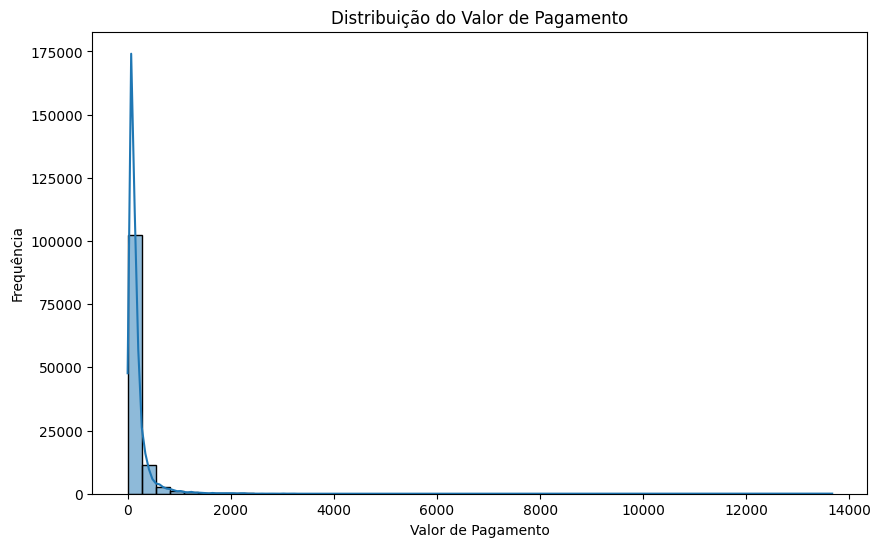

/tmp/ipython-input-2905373030.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_merged_data[df_merged_data['product_category_name_english'].isin(top_categories)]['product_category_name_english'], order=top_categories, palette='viridis')


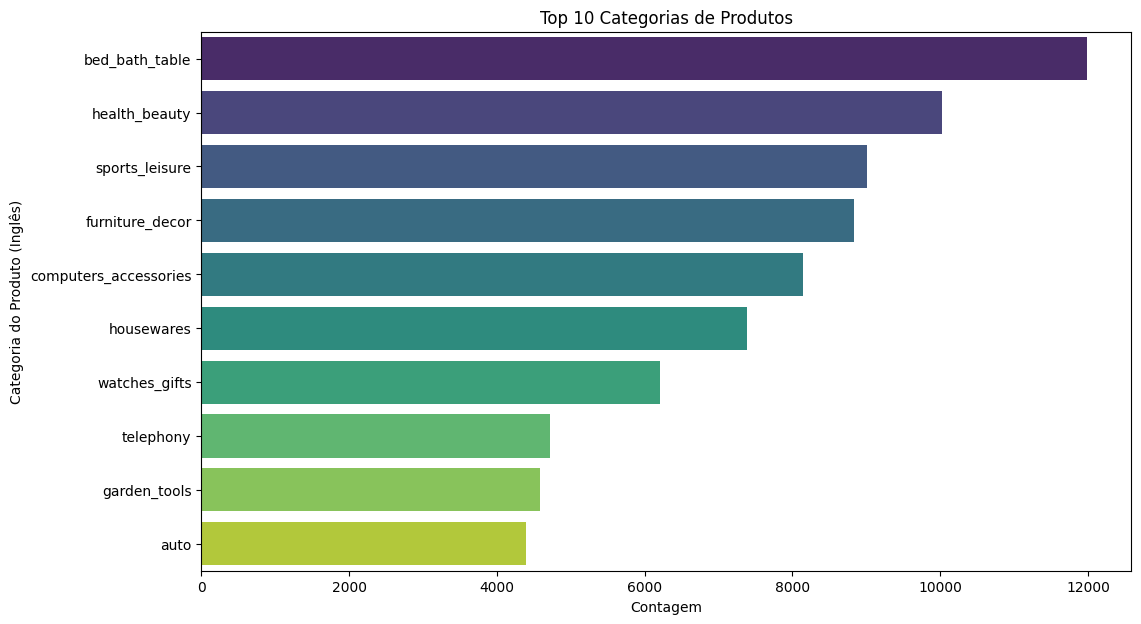

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Visualização Básica ---

# IMPORTANTE: Este código requer o DataFrame `df_merged_data`,
# que é gerado pelo pipeline ETL. Certifique-se de que seus arquivos
# de dados brutos estejam na pasta RAW_DATA_PATH e que o pipeline
# tenha sido executado com sucesso antes de tentar visualizar.

print("Preparando para visualização. Certifique-se de que `df_merged_data` esteja carregado.")

try:
    # Exemplo 1: Histograma de uma variável numérica
    if 'payment_value' in df_merged_data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_merged_data['payment_value'].dropna(), bins=50, kde=True)
        plt.title('Distribuição do Valor de Pagamento')
        plt.xlabel('Valor de Pagamento')
        plt.ylabel('Frequência')
        plt.show()
    else:
        print("Coluna 'payment_value' não encontrada em df_merged_data.")

    # Exemplo 2: Contagem de categorias de produto
    if 'product_category_name_english' in df_merged_data.columns:
        plt.figure(figsize=(12, 7))
        # Pegar as 10 categorias mais frequentes para melhor visualização
        top_categories = df_merged_data['product_category_name_english'].value_counts().nlargest(10).index
        sns.countplot(y=df_merged_data[df_merged_data['product_category_name_english'].isin(top_categories)]['product_category_name_english'], order=top_categories, palette='viridis')
        plt.title('Top 10 Categorias de Produtos')
        plt.xlabel('Contagem')
        plt.ylabel('Categoria do Produto (Inglês)')
        plt.show()
    else:
        print("Coluna 'product_category_name_english' não encontrada em df_merged_data.")

except NameError:
    print("Erro: O DataFrame `df_merged_data` não foi encontrado. Por favor, execute o pipeline ETL primeiro.")
except Exception as e:
    print(f"Ocorreu um erro durante a visualização: {e}")



##Estatística Descritiva: Calcular médias, medianas, desvios e identificar outliers.



In [66]:
def run_etl_pipeline():
    print("--- Starting ETL Pipeline ---")

    # Ensure output directories exist
    output_clean_path = os.path.dirname(PATH_CLEAN_CSV) # This seems to be set incorrectly as path_clean_csv is in raw
    # Let's adjust for the actual notebook structure where 01_raw is where files are loaded FROM
    # and 02_intermediate, 03_clean are where files are saved TO.

    intermediate_data_path = RAW_DATA_PATH.replace('01_raw', '02_intermediate')
    clean_data_path = RAW_DATA_PATH.replace('01_raw', '03_clean')

    os.makedirs(intermediate_data_path, exist_ok=True)
    os.makedirs(clean_data_path, exist_ok=True)

    print(f"Ensured directory exists: {RAW_DATA_PATH}")

    dfs = {}
    file_configs = {
        'customers': INPUT_CUSTOMERS_CSV,
        'orders': INPUT_ORDERS_CSV,
        'order_items': INPUT_ORDER_ITEMS_CSV,
        'order_payments': INPUT_ORDER_PAYMENTS_CSV,
        'order_reviews': INPUT_ORDER_REVIEWS_CSV,
        'products': INPUT_PRODUCTS_CSV,
        'product_category_name_translation': INPUT_PRODUCT_CATEGORY_TRANSLATION_CSV,
        'sellers': INPUT_SELLERS_CSV
    }

    # Load all CSVs into dataframes
    print("Loading dataframes...")
    try:
        for name, filename in file_configs.items():
            file_path = os.path.join(RAW_DATA_PATH, filename)
            print(f"Lendo CSV de {name} em: {file_path}")
            dfs[name] = pd.read_csv(file_path)

        # Convert customer data to JSON
        customer_json_path = os.path.join(intermediate_data_path, OUTPUT_CUSTOMERS_JSON)
        dfs['customers'].to_json(customer_json_path, orient='records', indent=4)
        print(f"Dados de clientes exportados para JSON em: {customer_json_path}")

        # Store order item data to SQLite
        sqlite_db_path = os.path.join(intermediate_data_path, OUTPUT_ORDER_ITEMS_DB)
        conn = sqlite3.connect(sqlite_db_path)
        dfs['order_items'].to_sql(SQL_TABLE_NAME, conn, if_exists='replace', index=False)
        conn.close()
        print(f"Dados de itens de pedido exportados para SQLite em: {sqlite_db_path}")

        # Merge DataFrames
        print("Merging dataframes...")
        # Start with orders and merge others step by step
        df_merged_data = dfs['orders'].merge(dfs['customers'], on='customer_id', how='left')
        df_merged_data = df_merged_data.merge(dfs['order_items'], on='order_id', how='left')
        df_merged_data = df_merged_data.merge(dfs['products'], on='product_id', how='left')
        df_merged_data = df_merged_data.merge(dfs['sellers'], on='seller_id', how='left')
        df_merged_data = df_merged_data.merge(dfs['order_payments'], on='order_id', how='left')
        df_merged_data = df_merged_data.merge(dfs['order_reviews'], on='order_id', how='left')
        df_merged_data = df_merged_data.merge(dfs['product_category_name_translation'], on='product_category_name', how='left')

        # Convert datetime columns
        for col in datetime_cols:
            if col in df_merged_data.columns:
                df_merged_data[col] = pd.to_datetime(df_merged_data[col], errors='coerce')

        print("ETL Pipeline finished successfully. Merged DataFrame created.")
        return df_merged_data

    except FileNotFoundError as e:
        print(f"Ocorreu um erro: Arquivo não encontrado - {e}")
        return None
    except Exception as e:
        print(f"Ocorreu um erro durante o pipeline ETL: {e}")
        return None

df_merged_data = run_etl_pipeline()

--- Starting ETL Pipeline ---
Ensured directory exists: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw
Loading dataframes...
Lendo CSV de customers em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_customers_dataset.csv
Lendo CSV de orders em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_orders_dataset.csv
Lendo CSV de order_items em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_order_items_dataset.csv
Lendo CSV de order_payments em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_order_payments_dataset.csv
Lendo CSV de order_reviews em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_order_reviews_dataset.csv
Lendo CSV de products em: /content/drive/MyDrive/Projetos/Estagio_CBL_CienciaDeDados_HDL/data/01_raw/olist_products_dataset.csv
Lendo CSV de product_category_name_translation em: /c

In [67]:
numerical_cols = df_merged_data.select_dtypes(include=np.number)

mean_stats = numerical_cols.mean().rename('Mean')
median_stats = numerical_cols.median().rename('Median')
std_stats = numerical_cols.std().rename('Standard Deviation')

descriptive_stats = pd.concat([mean_stats, median_stats, std_stats], axis=1)

print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)


Descriptive Statistics for Numerical Columns:
                                    Mean    Median  Standard Deviation
customer_zip_code_prefix    35033.451298  24240.00        29823.198969
order_item_id                   1.196543      1.00            0.699489
price                         120.646603     74.90          184.109691
freight_value                  20.032387     16.28           15.836850
product_name_lenght            48.767498     52.00           10.033540
product_description_lenght    785.967822    600.00          652.584121
product_photos_qty              2.205161      1.00            1.717452
product_weight_g             2112.250740    700.00         3786.695111
product_length_cm              30.265145     25.00           16.189367
product_height_cm              16.619706     13.00           13.453584
product_width_cm               23.074799     20.00           11.749139
seller_zip_code_prefix      24442.410413  13660.00        27573.004511
payment_sequential             

In [68]:
print("\nIdentifying Outliers using IQR method:")

# Columns for outlier detection
# Choosing a few relevant numerical columns where outliers could be significant
outlier_cols = ['price', 'freight_value', 'payment_value', 'product_weight_g', 'product_photos_qty', 'review_score']

for col in outlier_cols:
    if col in df_merged_data.columns and pd.api.types.is_numeric_dtype(df_merged_data[col]):
        Q1 = df_merged_data[col].quantile(0.25)
        Q3 = df_merged_data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_merged_data[(df_merged_data[col] < lower_bound) | (df_merged_data[col] > upper_bound)][col]

        print(f"\n--- Column: {col} ---")
        print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"Lower Bound (Outlier): {lower_bound:.2f}")
        print(f"Upper Bound (Outlier): {upper_bound:.2f}")
        print(f"Number of outliers: {len(outliers)}")
        if not outliers.empty:
            print("First 5 outliers (if any):\n", outliers.head())
    else:
        print(f"Column '{col}' not found or is not numeric in df_merged_data. Skipping outlier detection for this column.")


Identifying Outliers using IQR method:

--- Column: price ---
Q1: 39.90, Q3: 134.90, IQR: 95.00
Lower Bound (Outlier): -102.60
Upper Bound (Outlier): 277.40
Number of outliers: 8867
First 5 outliers (if any):
 20    1299.0
37     279.0
45     445.0
48     339.0
61     369.0
Name: price, dtype: float64

--- Column: freight_value ---
Q1: 13.08, Q3: 21.18, IQR: 8.10
Lower Bound (Outlier): 0.93
Upper Bound (Outlier): 33.33
Number of outliers: 12740
First 5 outliers (if any):
 20    77.45
29    57.58
32    48.64
33    48.64
37    34.19
Name: freight_value, dtype: float64

--- Column: payment_value ---
Q1: 60.85, Q3: 189.24, IQR: 128.39
Lower Bound (Outlier): -131.74
Upper Bound (Outlier): 381.83
Number of outliers: 9638
First 5 outliers (if any):
 20    1376.45
45     508.17
61     386.33
75     824.76
76     824.76
Name: payment_value, dtype: float64

--- Column: product_weight_g ---
Q1: 300.00, Q3: 1800.00, IQR: 1500.00
Lower Bound (Outlier): -1950.00
Upper Bound (Outlier): 4050.00
Numbe

##Desenvolver o segundo script de análise para extrair um insight claro (ex: "Qual a categoria de produto com maior margem, mas com o maior tempo médio de entrega?") e gerar um gráfico de visualização (relatório simples).

In [69]:
df_merged_data['margin'] = df_merged_data['price'] - df_merged_data['freight_value']

# Calculate delivery time in days
# The timestamp columns were already converted to datetime objects during the ETL pipeline
df_merged_data['delivery_time'] = (df_merged_data['order_delivered_customer_date'] - df_merged_data['order_purchase_timestamp']).dt.total_seconds() / (60 * 60 * 24)

# Group by product category and calculate average margin and delivery time
category_insights = df_merged_data.groupby('product_category_name_english')[['margin', 'delivery_time']].mean().reset_index()

print("Category Insights (Top 5 rows):")
print(category_insights.head())
print("\nCategory Insights (Bottom 5 rows):")
print(category_insights.tail())

Category Insights (Top 5 rows):
  product_category_name_english      margin  delivery_time
0    agro_industry_and_commerce  305.060040      11.920452
1              air_conditioning  162.628742      12.315180
2                           art   93.748630      11.221993
3         arts_and_craftmanship   60.161667       5.719785
4                         audio  122.063990      13.296618

Category Insights (Bottom 5 rows):
   product_category_name_english      margin  delivery_time
66                    stationery   72.544571      12.701793
67        tablets_printing_image   75.171724      12.770446
68                     telephony   56.129937      12.882009
69                          toys   98.112280      11.701442
70                 watches_gifts  185.063626      12.696921


Threshold for high margin (75th percentile): 120.83
Threshold for high delivery time (75th percentile): 12.94

Categories with high average margin and high average delivery time (Top 10):
   product_category_name_english       margin  delivery_time
14                     computers  1055.676409      13.435387
45             home_appliances_2   411.558815      13.666891
16                consoles_games   122.271896      13.591597
4                          audio   122.063990      13.296618
61         security_and_services   121.035000      15.138154


/tmp/ipython-input-3285463129.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


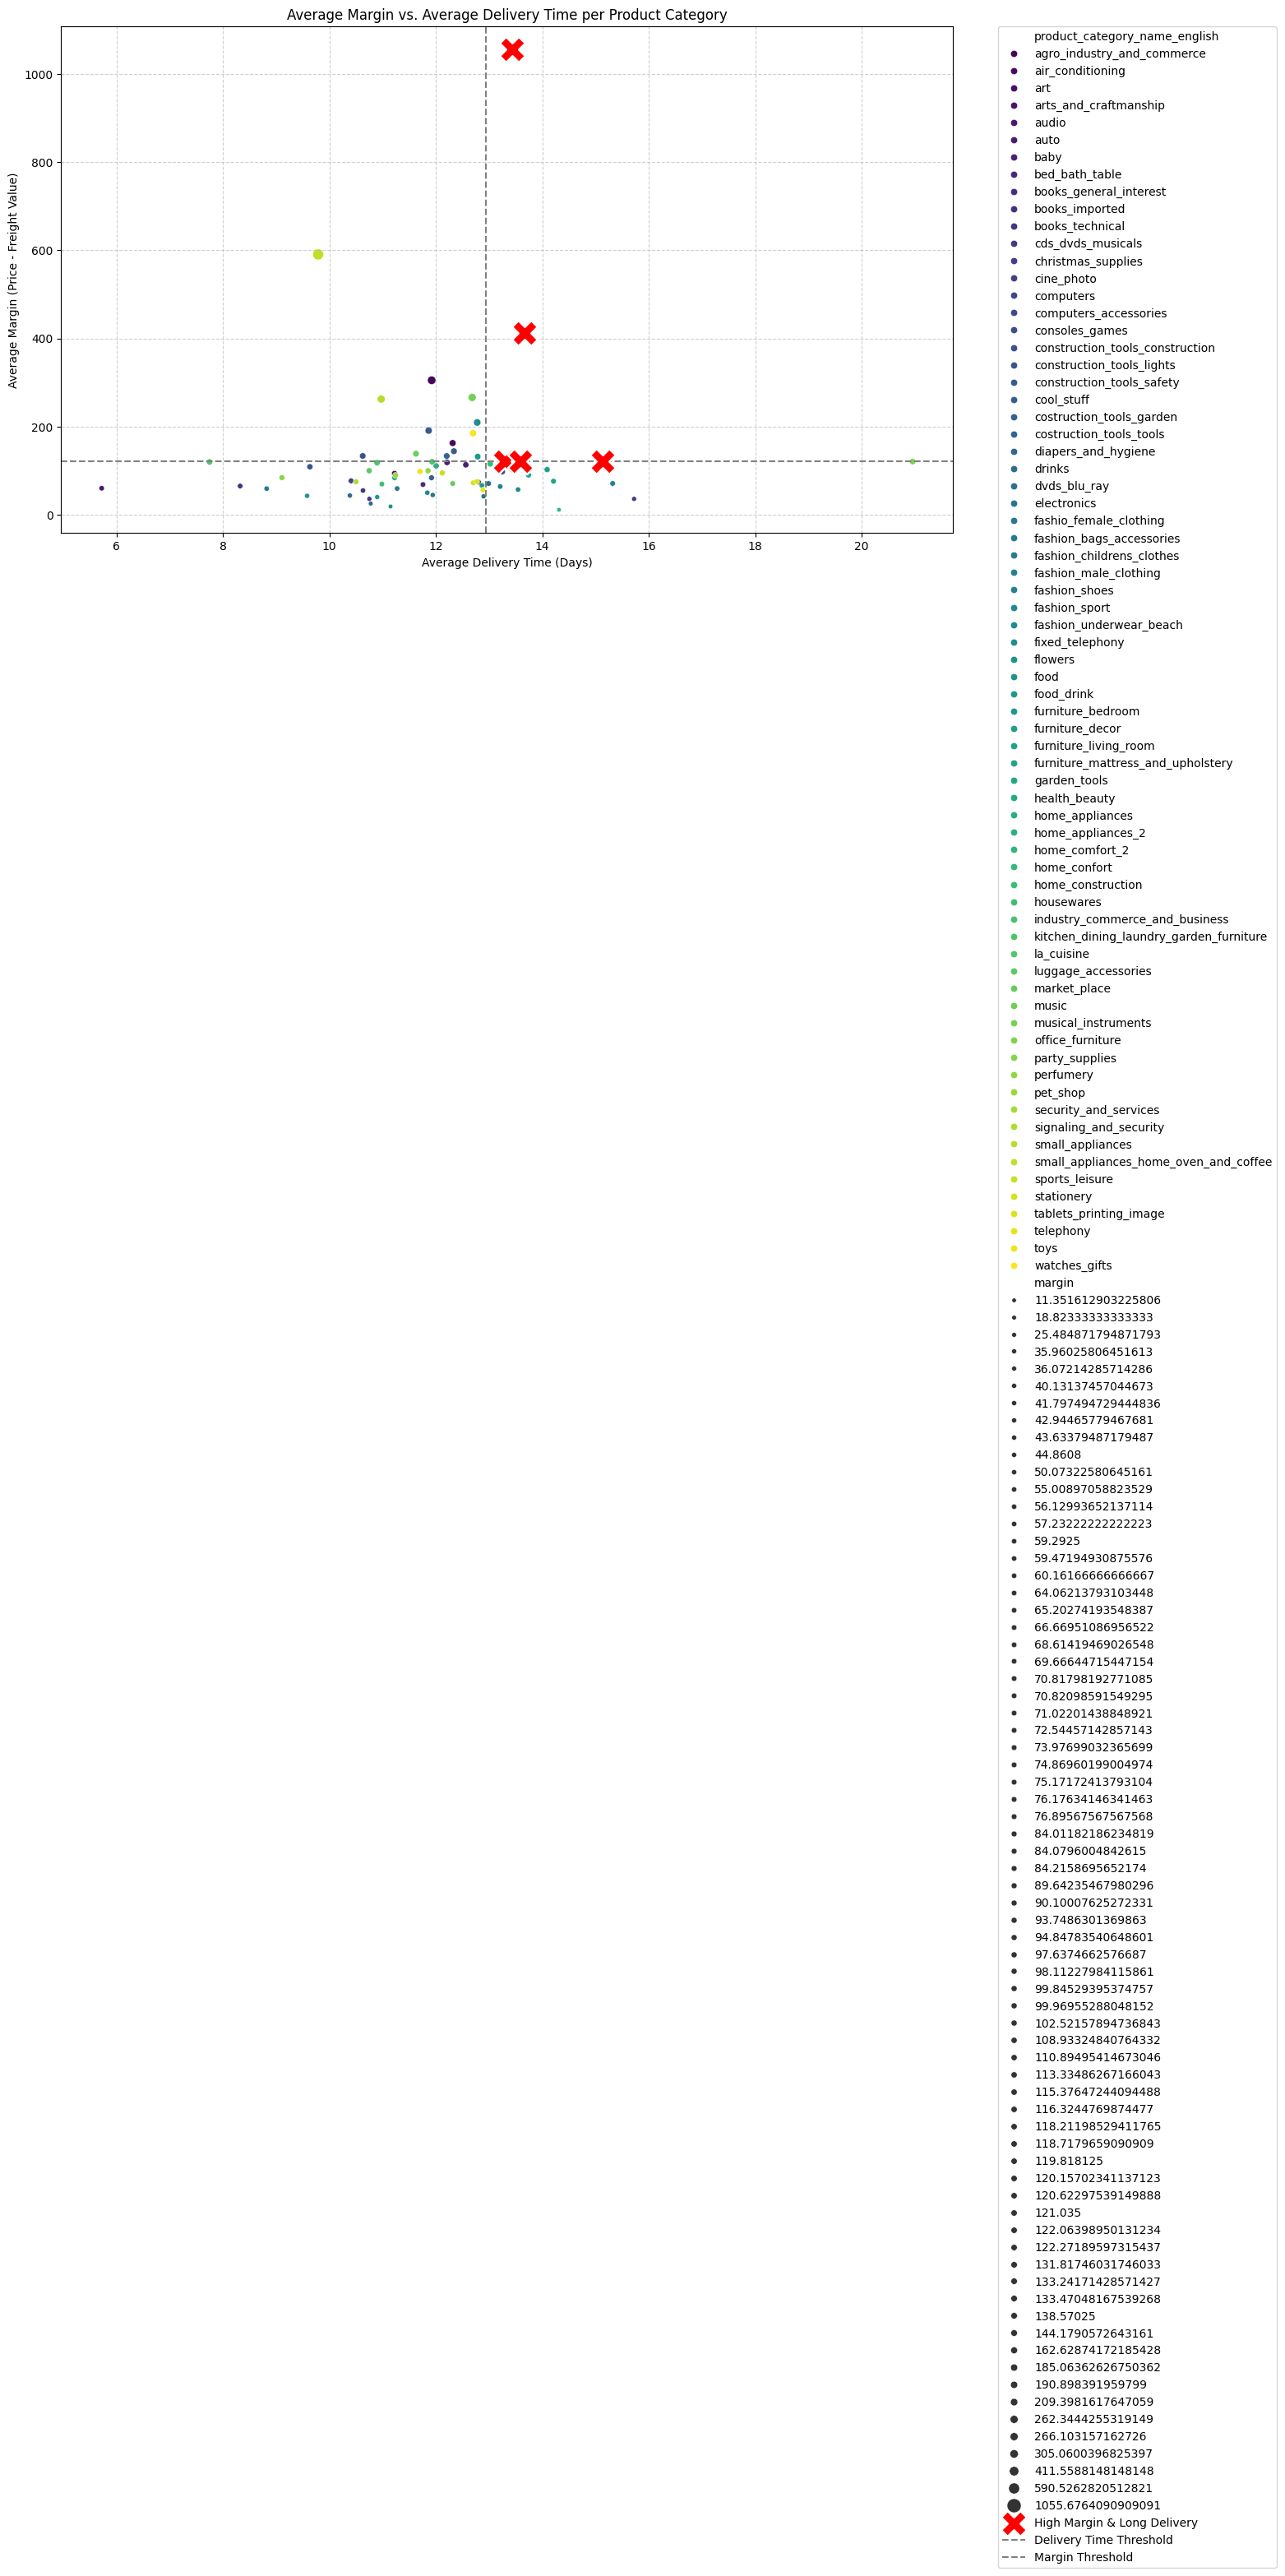

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define thresholds for 'high' margin and 'high' delivery time
# These can be adjusted based on business context or statistical distribution

# Calculate the 75th percentile (Q3) for both margin and delivery_time
margin_threshold = category_insights['margin'].quantile(0.75)
delivery_time_threshold = category_insights['delivery_time'].quantile(0.75)

print(f"Threshold for high margin (75th percentile): {margin_threshold:.2f}")
print(f"Threshold for high delivery time (75th percentile): {delivery_time_threshold:.2f}")

# Filter categories that meet both criteria
high_margin_long_delivery = category_insights[
    (category_insights['margin'] >= margin_threshold) &
    (category_insights['delivery_time'] >= delivery_time_threshold)
]

print("\nCategories with high average margin and high average delivery time (Top 10):")
print(high_margin_long_delivery.sort_values(by=['margin', 'delivery_time'], ascending=[False, False]).head(10))

# Visualize the relationship between margin and delivery time, highlighting the identified categories
plt.figure(figsize=(14, 8))
sns.scatterplot(data=category_insights, x='delivery_time', y='margin', hue='product_category_name_english', size='margin', sizes=(15, 150), legend='full', palette='viridis')
sns.scatterplot(data=high_margin_long_delivery, x='delivery_time', y='margin', color='red', marker='X', s=500, label='High Margin & Long Delivery', zorder=5)

plt.axvline(x=delivery_time_threshold, color='grey', linestyle='--', label='Delivery Time Threshold')
plt.axhline(y=margin_threshold, color='grey', linestyle='--', label='Margin Threshold')

plt.title('Average Margin vs. Average Delivery Time per Product Category')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Average Margin (Price - Freight Value)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()
